# Classification metrics
## Introduction

this is the companion colab code for my tutorial in medium about Classification metrics in Python, please read the article for better understanding of the code. In the article I discuss about the theory, the calculation, how to efficiently use the metrics. Here I am providing just generic information about the metrics and the code. 
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[Medium article about classification metrics](https://)

note: the articles will be publish soon

for other stories check my medium profile:
[Salvatore Raieli](https://salvatore-raieli.medium.com/)

In [1]:
#importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix, balanced_accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, cohen_kappa_score
from sklearn.metrics import average_precision_score, matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_roc_curve

## A complete example with scikit-learn

Here, I present a binary classification problem and how to evaluate the results using scikit-learn. In the next section, I will show how to obtain the same evaluation metrics using just numpy (that would explain all the passage to how to calculate the evaluation metrics). I will use the wine dataset that you can find in this repository (section datasets).

In [2]:
#loading the dataset
white = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/winequality-red.csv"
white = pd.read_csv(white, sep = ";")
white.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


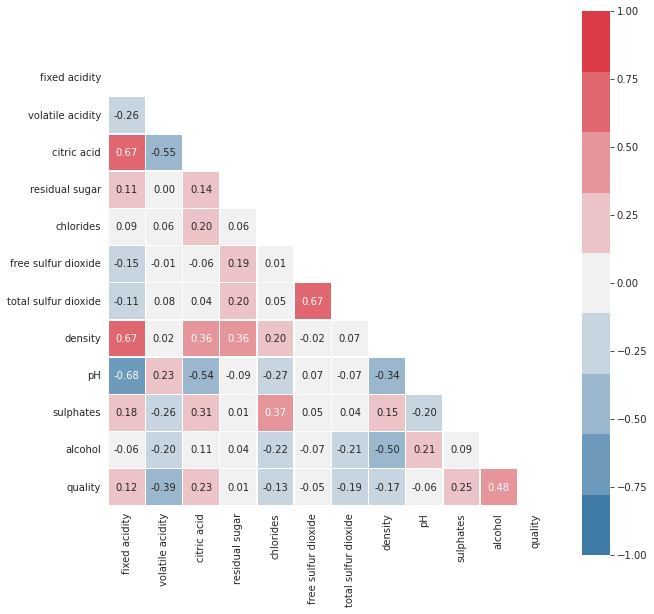

In [3]:
corr = white.corr() #calulating the correlation
mask = np.zeros_like(corr) #to mask the other corner, which is redundant
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, linewidths=.5, 
                     cmap=sns.diverging_palette(240, 10, n=9), #diverging palette to show corr and anticorr in different colors
                     vmin = -1, vmax = 1, annot=True, fmt=".2f", square=True)

Text(0.5, 1.0, 'white wine quality')

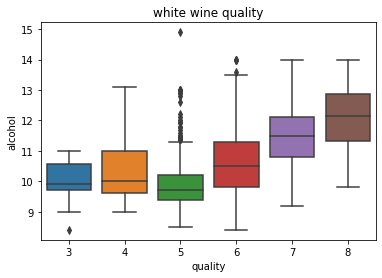

In [4]:
#plotting a boxplot 
ax = sns.boxplot(x="quality", y="alcohol", data=white)
ax.set_title('white wine quality')

In [5]:
#binarize the target variable
white["wine_quality"] = [1 if x>6 else 0 for x in white.quality]
#separing the input features from the target variable
y_w = white["wine_quality"]
X_w = white.drop(["quality", "wine_quality"], axis=1)
#stratify training and test set
X_train, X_test, y_train, y_test = train_test_split(X_w , y_w, 
                                                        test_size = 0.2, #test size would be 20%
                                                        random_state = 42, #42 is for good luck!
                                                        stratify = y_w) #stratify is for balancing the categories in the sampling

#scaling the white
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #this to avoid information leakage

#training a classifier, we use here random forest
clf = RandomForestClassifier(random_state=0, max_depth =10 ,max_features = 7)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)


(274, 3, 18, 25)

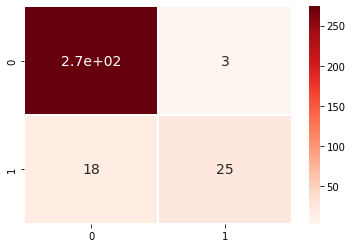

In [6]:
#confusion matrix
conf = confusion_matrix(y_test, preds)
tn, fp, fn, tp = conf.ravel()
ax = sns.heatmap(conf, annot = True, annot_kws={"size": 14}, 
                 linewidths=.5, cmap="Reds")
tn, fp, fn, tp  

In [7]:
prob = clf.predict_proba(X_test)[:,1]
acc = accuracy_score(y_test, preds)
bal_acc = balanced_accuracy_score(y_test, preds)
MCC = matthews_corrcoef(y_test, preds)
Cohen = cohen_kappa_score(y_test, preds)
AUC = roc_auc_score(y_test, prob)
AUC_PR = average_precision_score(y_test, prob, pos_label=1)
prec = precision_score(y_test, preds, average="binary", pos_label=1)
rec = recall_score(y_test, preds, pos_label=1)
F1 = f1_score(y_test, preds, pos_label=1)
print("Accuracy : {:.2f}, Balanced Accuracy : {:.2f}".format(acc, bal_acc) )
print("MCC : {:.2f}, Cohen's score : {:.2f}".format(MCC, Cohen) )
print("AUC : {:.2f}, AUC Precision Recall : {:.2f}".format(AUC, AUC_PR) )
print("Recall: {:.2f}, Precision  : {:.2f}".format(rec, F1) )
print("F1 : {:.2f}".format(F1) )

Accuracy : 0.93, Balanced Accuracy : 0.79
MCC : 0.69, Cohen's score : 0.67
AUC : 0.94, AUC Precision Recall : 0.85
Recall: 0.58, Precision  : 0.70
F1 : 0.70


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


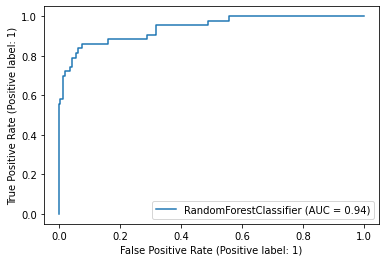

In [8]:
plot_roc_curve(clf, X_test, y_test) 

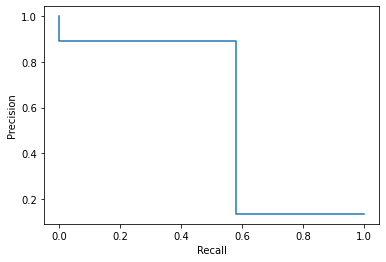

In [9]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
predictions = clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

## Evaluation metric

I will show how to implement the evaluation metric doing all the calculation. This should makes more clear the process especially for ROC curve.

In [10]:
#starting from the confusion matrix
conf = confusion_matrix(y_test, preds)
#we define accuracy
def Accuracy(conf = None):
  """ as input a confusion matrix, return a accuracy score """
  tn, fp, fn, tp = conf.ravel() 
  n = conf.sum() #total number of examples in the test set
  acc= (tp + tn)/n #accuracy score calculation
  return acc
#we define now error rate
def Error_rate(conf = None):
  """ as input a confusion matrix, return a error rate score """
  tn, fp, fn, tp = conf.ravel() 
  n = conf.sum()
  error = (fp + fn)/n
  return error
#you can check that the value are the same
Accuracy(conf), Error_rate(conf)

(0.934375, 0.065625)

In [11]:
#starting from the confusion matrix
conf = confusion_matrix(y_test, preds)
#we define accuracy
def Precision(conf = None):
  """ as input a confusion matrix, return a Precision score """
  tn, fp, fn, tp = conf.ravel() 
  pre= tp/(tp +fp) 
  return pre
#we define now error rate
def Recall(conf = None):
  """ as input a confusion matrix, return a def Recall score """
  tn, fp, fn, tp = conf.ravel() 
  rec = tp/(tp +fn) 
  return rec
#you can check that the value are the same
Precision(conf), Recall(conf)

(0.8928571428571429, 0.5813953488372093)

In [12]:
#True Positive Rate or Recall
TPR = tp/(tp +fn)

def TPR(conf = None):
  """ as input a confusion matrix, return TPR """
  tn, fp, fn, tp = conf.ravel() 
  TPR = tp/(tp +fn)
  return TPR

#False Positive Rate
FPR = fp/(fp +tn)

def FPR(conf = None):
  """ as input a confusion matrix, return FPR """
  tn, fp, fn, tp = conf.ravel() 
  FPR = fp/(fp +tn)
  return FPR

#True Negative Rate
TNR = tn/(fp +tn)

def TNR(conf = None):
  """ as input a confusion matrix, return TNR """
  tn, fp, fn, tp = conf.ravel() 
  TNR = tn/(fp +tn)
  return TNR

#False Negative Rate
FNR = fn/(tp +fn)

def FNR(conf = None):
  """ as input a confusion matrix, return FNR """
  tn, fp, fn, tp = conf.ravel() 
  FNR = fn/(tp +fn)
  return FNR

#Positive Predictive Value (PPV) or precision
PPV = tp/(tp + fp)

def PPV(conf = None):
  """ as input a confusion matrix, return PPV """
  tn, fp, fn, tp = conf.ravel() 
  PPV = tp/(tp + fp)
  return PPV

#False Discovery Rate
FDR =fp/(tp +fp)

def FDR(conf = None):
  """ as input a confusion matrix, return FDR """
  tn, fp, fn, tp = conf.ravel() 
  FDR =fp/(tp +fp)
  return FDR

#False Omission Rate
FOR = fn/(fn+tn)

def FOR(conf = None):
  """ as input a confusion matrix, return FOR """
  tn, fp, fn, tp = conf.ravel() 
  FOR = fn/(fn+tn)
  return FOR

#Negative Predictive Value
NPV = tn/(fn+tn)

def NPV(conf = None):
  """ as input a confusion matrix, return FOR """
  tn, fp, fn, tp = conf.ravel() 
  NPV = tn/(fn+tn)
  return NPV

## F1 score

I show here the calculation of the F1 score. I will show also why we are using the harmonic mean. Check the plots below, what is the value of F1 with different values of precision and recall in the case of arithmetic or harmonic mean?

In [13]:
#F1 score
#Precision
precision = tp/(tp + fp)
#Recall
recall = tp/(tp +fn)
F1 = 2*((precision*recall)/(precision+recall))
F1

0.7042253521126761

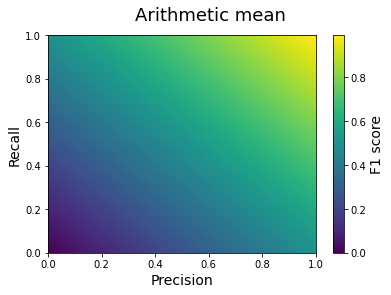

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1, 100)
y = np.linspace(0,1, 100)

def f(x, y):
    return (x+y)/2 

X, Y = np.meshgrid(x,y)
Z = np.zeros((100,100))

for i in range(100):
   for j in range(100):
       Z[i,j] = f(X[i,j],Y[i,j])

plt.pcolor(X, Y, Z)
plt.suptitle('Arithmetic mean', fontsize=18)
plt.xlabel('Precision', fontsize=14)
plt.ylabel('Recall', fontsize=14)
cbar = plt.colorbar()
cbar.set_label('F1 score', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


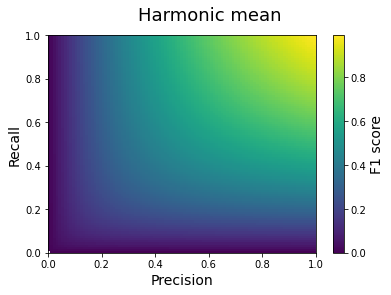

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1, 100)
y = np.linspace(0,1, 100)

def f(x, y):
    return 2*((x*y)/(x+y))

X, Y = np.meshgrid(x,y)
Z = np.zeros((100,100))

for i in range(100):
   for j in range(100):
       Z[i,j] = f(X[i,j],Y[i,j])

plt.pcolor(X, Y, Z)
plt.suptitle('Harmonic mean', fontsize=18)
plt.xlabel('Precision', fontsize=14)
plt.ylabel('Recall', fontsize=14)
cbar = plt.colorbar()
cbar.set_label('F1 score', fontsize=14)
plt.show()

In [16]:
def F1(conf = None):
  """ calculate F1 score from confusion matrix """
  tn, fp, fn, tp = conf.ravel()
  #Precision
  precision = tp/(tp + fp)
  #Recall
  recall = tp/(tp +fn)
  F1 = 2*((precision*recall)/(precision+recall))
  return F1

## Other evaluation metric
* Cohen's Kappa
* MCC
* G-Measure

In [17]:
def Cohen_kapp(conf = None):
  """Cohen's kappa"""
  tn, fp, fn, tp = conf.ravel()
  PPOS = tp +fp
  PNEG = fn +tn
  POS = tp +fn
  NEG = fp + tn
  n = conf.sum()
  e_TP = (POS*PPOS)/n
  e_TN = (NEG*PNEG)/n
  acc = (tp + tn)/n
  acc_e = (e_TP + e_TN )/n
  cohen = (acc - acc_e)/(1-acc_e)
  return cohen

Cohen_kapp(conf)

0.6691610870421425

In [18]:
#Matthews correlation coefficient 
def MCC(conf = None):
  tn, fp, fn, tp = conf.ravel()
  PPOS = tp +fp
  PNEG = fn +tn
  POS = tp +fn
  NEG = fp + tn
  numerator = (tp*tn)+(fp*fn)
  denominator =np.sqrt(POS*NEG*PPOS*PNEG)
  MCC= numerator/denominator
  return MCC

MCC(conf)

0.6996103551631925

In [19]:
#G-measure
def G_measure(conf = None):
  tn, fp, fn, tp = conf.ravel()
  precision = tp/(tp + fp)
  recall = tp/(tp +fn)
  G = np.sqrt(precision* recall)
  return G

G_measure(conf)

0.7204880221302937

## Receiver operating characteristic (ROC) curve 

In this section I show I generate the image about the threshold (so you may use to play different thresholds, or you can generate a confusion matrix). I also show you how to generate the ROC curve and calculate the area under the curve without the use of built-in function of scikit-learn. 

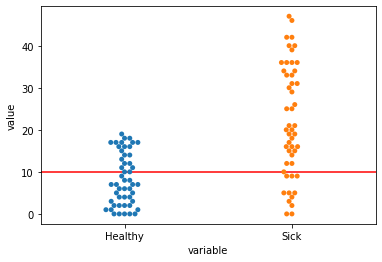

In [20]:
df = pd.DataFrame(columns  = ["Healthy", "Sick"])
df["Healthy"] = np.random.randint(20, size=50)
df["Sick"] = np.random.randint(50, size=50)
df = pd.melt(df)
ax = sns.swarmplot(x="variable", y="value", data=df)
plt.axhline(y=10, color='r', linestyle='-')

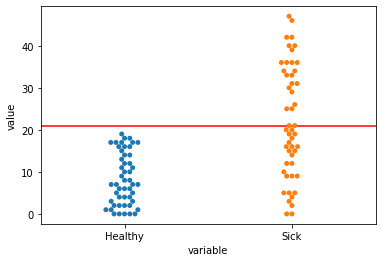

In [21]:
ax = sns.swarmplot(x="variable", y="value", data=df)
plt.axhline(y=21, color='r', linestyle='-')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


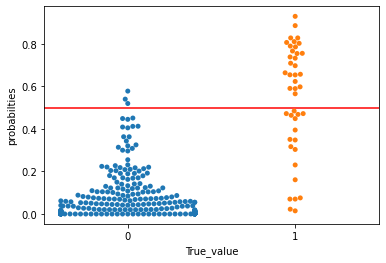

In [22]:
df = pd.DataFrame(columns  = ["True_value", "probabilties"])
df["True_value"] = y_test
df["probabilties"] = prob
ax = sns.swarmplot(x="True_value", y="probabilties", data=df)
plt.axhline(y=0.5, color='r', linestyle='-')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


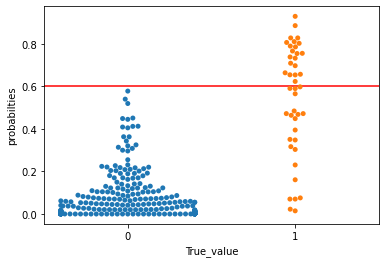

In [23]:
ax = sns.swarmplot(x="True_value", y="probabilties", data=df)
plt.axhline(y=0.6, color='r', linestyle='-')

In [24]:
#start by ranking all the values and linking each value to the class label
df = pd.DataFrame(zip(prob, y_test), columns = ["probability", "label" ])
#sort
df = df.sort_values(by= "probability", ascending = False)
#cumulative sum for positive and negative class
df["pos_class_sum"] = df.label.cumsum()
df["neg"] = np.where(df.label == 0,1,0)
df["neg_class_sum"] = df.neg.cumsum()
df = df.drop("neg", axis =1)
#calculated true positive and false positive rates for a scenario where 
#the specific probabilistic value is used as cut-off
df["sensitivity"]  = df["pos_class_sum"]/df.label.value_counts().to_list()[1] 
df["FPR"] =  df["neg_class_sum"]/ df.label.value_counts().to_list()[0] 
df
#to calculate the area under the curve
from numpy import trapz
AUC = trapz( df["sensitivity"], df["FPR"])

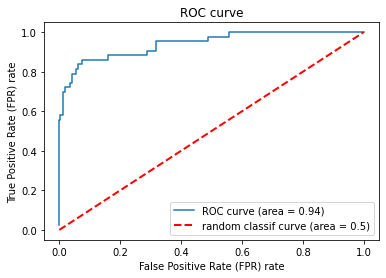

In [25]:
#plotting the curve
plt.plot(df["FPR"], df["sensitivity"], label="ROC curve (area = %0.2f)" % AUC)
plt.xlabel("False Positive Rate (FPR) rate")
plt.ylabel("True Positive Rate (FPR) rate")
plt.title("ROC curve")

plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--",
        label="random classif curve (area = 0.5)" )
plt.legend(loc="lower right")